In [24]:
import time
import re
from typing import List


from dao.base import DAOBase
from dao.email import DAOEmail, DAOEmailGmail, AVAILABLE_EMAIL_DAOS
from models.email import Email, EmailGithub, EmailGmail
from dao.email import DAOEmailSpamAssassin
from analysis.attribute_retriving import extract_strings_from_html, detect_language, detect_language_by_voting
from analysis.attribute_statistics import SimpleLanguageStatistics

from tqdm import tqdm
from dateutil import parser as date_parser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
private_emails: List[Email] = []
dao = AVAILABLE_EMAIL_DAOS['class_git']
private_emails.extend(dao.find_many_by_query({'inner_classification': "personal"}))
dao = AVAILABLE_EMAIL_DAOS['spam_assassin']
private_emails.extend(dao.find_many_by_query({'is_spam': False}))
dao = AVAILABLE_EMAIL_DAOS['gmail1']
private_emails.extend(dao.find_many_by_query({'email_labels': {'$not':{'$regex': "Kategori"}}}))
dao = AVAILABLE_EMAIL_DAOS['gmail2']
private_emails.extend(dao.find_many_by_query({'email_labels': {'$not':{'$regex': "Kategori"}}}))
dao = AVAILABLE_EMAIL_DAOS['gmail3']
private_emails.extend(dao.find_many_by_query({'email_labels': {'$not':{'$regex': "Kategori"}}}))

In [6]:
pl_private_emails = [e for e in private_emails if e.detected_language == 'pl']
en_private_emails = [e for e in private_emails if e.detected_language == 'en']

In [7]:
len(pl_private_emails)

444

In [8]:
len(en_private_emails)

9753

In [11]:
all_emails: List[Email] = []
for dao_name in AVAILABLE_EMAIL_DAOS:
    dao = AVAILABLE_EMAIL_DAOS[dao_name]
    all_emails.extend(dao.find_many_by_query({}))

In [12]:
len(all_emails)

58932

In [13]:
pl_all_emails = [e for e in all_emails if e.detected_language == 'pl']
en_all_emails = [e for e in all_emails if e.detected_language == 'en']

In [14]:
len(pl_all_emails)

31737

In [15]:
len(en_all_emails)

26912

In [19]:
def analyze_text_lengths(texts: list[str]):
    # Convert each text into its length (number of characters)
    lengths = [len(text) for text in texts]

    # Calculate mean, median, and variance
    mean_length = np.mean(lengths)
    median_length = np.median(lengths)
    variance_length = np.var(lengths)

    plt.hist(lengths, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title('Distribution of Text Lengths')
    plt.xlabel('Text Length (number of characters)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)

    plt.show()

    return mean_length, median_length, variance_length

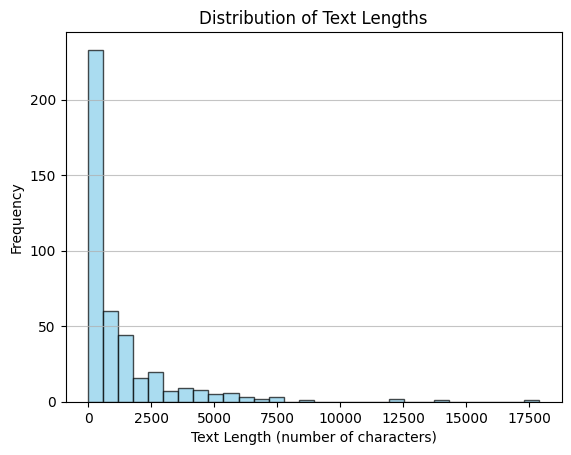

(1216.41567695962, 458.0, 4023033.487545207)

In [20]:
analyze_text_lengths([e.text_plain for e in pl_private_emails if e.text_plain])

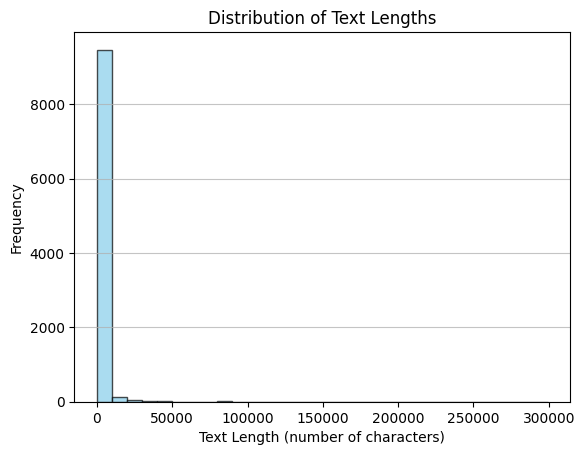

(2022.2952204367532, 968.0, 47114472.473619506)

In [21]:
analyze_text_lengths([e.text_plain for e in en_private_emails if e.text_plain])

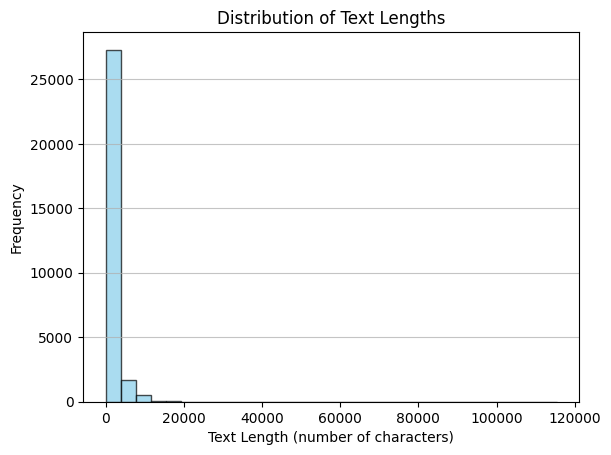

(1523.8725274725275, 777.0, 6765396.64735177)

In [22]:
analyze_text_lengths([e.text_plain for e in pl_all_emails if e.text_plain])

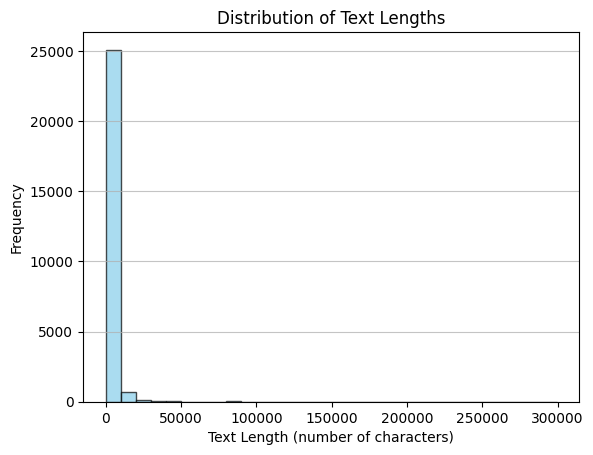

(2171.201493974048, 1008.0, 34474223.26135235)

In [23]:
analyze_text_lengths([e.text_plain for e in en_all_emails if e.text_plain])

In [25]:
def analyze_word_counts(texts: list[str]):
    # Remove punctuation and count words
    word_counts = [len(re.findall(r'\b\w+\b', text)) for text in texts]

    # Calculate mean, median, and variance
    mean_count = np.mean(word_counts)
    median_count = np.median(word_counts)
    variance_count = np.var(word_counts)

    plt.hist(word_counts, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title('Distribution of Word Counts')
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)

    plt.show()

    return mean_count, median_count, variance_count

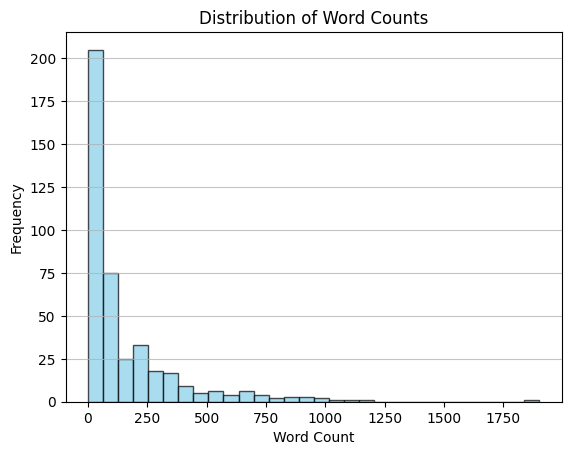

(157.86935866983373, 67.0, 52225.13970243906)

In [26]:
analyze_word_counts([e.text_plain for e in pl_private_emails if e.text_plain])

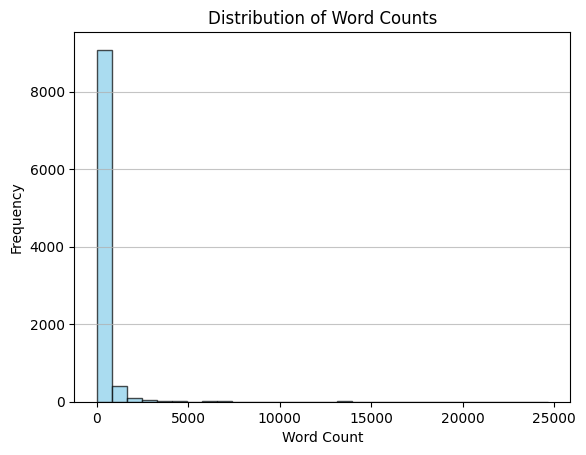

(316.74526163988463, 157.0, 650204.7504153312)

In [27]:
analyze_word_counts([e.text_plain for e in en_private_emails if e.text_plain])

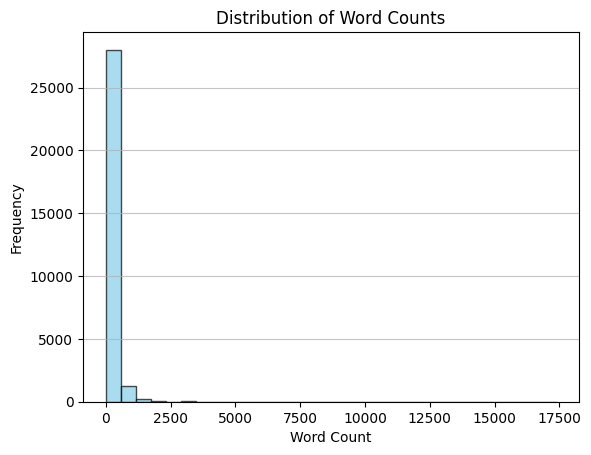

(195.8856804733728, 103.0, 112184.92924719122)

In [28]:
analyze_word_counts([e.text_plain for e in pl_all_emails if e.text_plain])

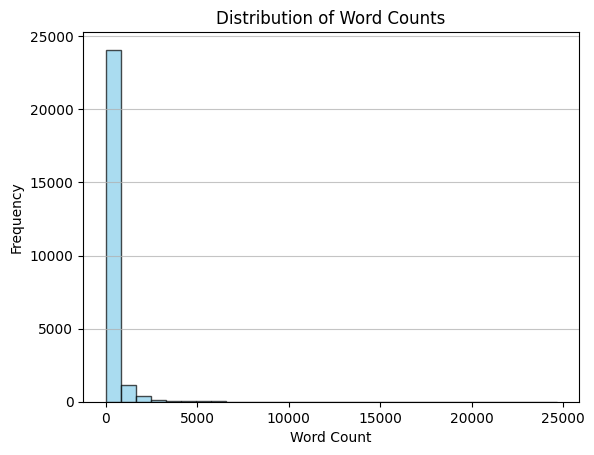

(318.0538292711101, 157.0, 496476.37021087663)

In [29]:
analyze_word_counts([e.text_plain for e in en_all_emails if e.text_plain])